# Lecture 4: Likelihood and Maximum Likelihood Estimate

## Instructor： 胡传鹏（博士）[Dr. Hu Chuan-Peng]

### 南京师范大学心理学院[School of Psychology, Nanjing Normal University]
 


## Part 2: How to combine likelihood and prior to form a posterior

接下来我们将介绍贝叶斯公式背后的机制，尤其是先验的改变会如何影响到后验分布

下面的例子提供了一种关于贝叶斯规则的直觉理解

一个袋子里有四个鹅卵石，只有两种颜色：白和蓝。

两种颜色的石头各有几块是未知的 (Source: Statistical rethinking)。

根据已有的信息，可以判断四个石头颜色组合的可能情况有五种：

![Image Name](https://cdn.kesci.com/upload/image/rhq5sehdsv.png?imageView2/0/w/360/h/360)


当我们摸到一个鹅卵石，我们得知这个鹅卵石是蓝色的，现在我们需要根据摸到的这个鹅卵石的颜色来判断盒子中蓝色鹅卵石的数量。



由于我们事先并没有得到任何有关这个袋子中鹅卵石的数量的信息，故我们假定这个盒子中蓝色鹅卵石的数量的概率是均匀分布的，且各种数量的蓝色鹅卵石出现的概率之和为1

袋子里的蓝色鹅卵石的数量分别为0,1,2,3,4的情况下，先验概率分别为[0.2 0.2 0.2 0.2 0.2]


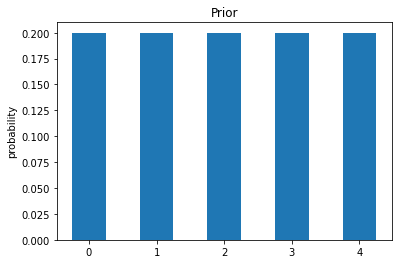

In [4]:
# numpy 是专门用于数组运算的包
import numpy as np

# 从scipy.stats里载入均匀分布的函数
from scipy.stats import uniform

# matplotlib.pyplot 是专门用于画图的包
import matplotlib.pyplot as plt

# 起点为0，终点为5(不包括5)，步长为1生成5个数
x = np.arange(start = 0, stop = 5, step = 1)

# 均匀分布的概率密度函数,x为变量，0为均匀分布起点，5为均匀分布的点的数量
y_prior = uniform.pdf(x,loc = 0,scale = 5)

# 画条形图
plt.bar(x,y_prior,width=0.5)

# 添加标题
plt.title("Prior")

# 添加y轴标签
plt.ylabel("probability")

print(f"袋子里的蓝色鹅卵石的数量分别为0,1,2,3,4的情况下，先验概率分别为{y_prior}")

我们假定X为摸到的球的颜色

$ X \in \left \{ 0,1 \right \}  $ 

$ X = 0 $ 代表白色鹅卵石

$ X = 1 $ 代表蓝色鹅卵石

当我们摸到一个鹅卵石，这只鹅卵石是蓝色鹅卵石，那么我们该如何推断袋子中蓝色鹅卵石的总数？

假定袋子中有$\alpha$个蓝色鹅卵石，$\alpha \in \left \{ 0,1,2,3,4 \right \} $

在不同$\alpha$条件下，观察到一个蓝色鹅卵石的概率为$Pr(X=1|Y = \alpha) = \alpha/4$

根据上节课学到的知识，我们知道这个是不同$\alpha$条件下，我们观察到一个鹅卵石是蓝色鹅卵石的似然

袋子里的蓝色鹅卵石的数量分别为0,1,2,3,4的情况下,似然分别为[0.   0.25 0.5  0.75 1.  ]


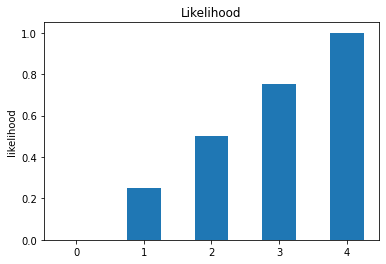

In [5]:
# numpy 是专门用于数组运算的包
import numpy as np

# matplotlib.pyplot 是专门用于画图的包
import matplotlib.pyplot as plt

# 起点为0，终点为5(不包括5)，步长为1生成5个数
x = np.arange(start = 0, stop = 5, step = 1)

# Pr(X=1|Y = \alpha) = \alpha/4
y_likelihood = x/4
# 画条形图
plt.bar(x,y_likelihood,width=0.5)

# 添加标题
plt.title("Likelihood")

# 添加y轴标签
plt.ylabel("likelihood")

print(f"袋子里的蓝色鹅卵石的数量分别为0,1,2,3,4的情况下,似然分别为{y_likelihood}")

Bayes' rule


$ P(\theta|data) = \frac{P(data|\theta)*P(\theta)}{P(data)} \propto P(data|\theta)*P(\theta) $ 

根据贝叶斯定理，我们在给定当前观察到的现象的情况下，对参数的概率的信念会随着参数的先验概率和给定参数下的似然而发生信念的更新

盒子里的球的数量分别为0,1,2,3,4,5的情况下,后验概率分别为[0.  0.1 0.2 0.3 0.4]


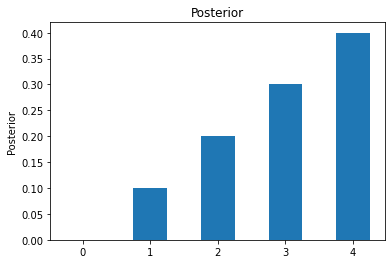

In [6]:
# numpy 是专门用于数组运算的包
import numpy as np

# matplotlib.pyplot 是专门用于画图的包
import matplotlib.pyplot as plt

# 起点为0，终点为5(不包括5)，步长为1生成5个数
x = np.arange(start = 0, stop = 5, step = 1)

# p(data) = \sum{p(data|\theta)p(\theta)}
y_margin = np.sum(y_prior*y_likelihood)


# P(\theta|data) = \frac{P(data|\theta)*P(\theta)}{P(data)} 
y_posterior = (y_prior*y_likelihood)/y_margin

# 画条形图
plt.bar(x,y_posterior,width=0.5)

# 添加标题
plt.title("Posterior")

# 添加y轴标签
plt.ylabel("Posterior")

print(f"袋子里的蓝色鹅卵石的数量分别为0,1,2,3,4,5的情况下,后验概率分别为{y_posterior}")


In [7]:
# numpy 是专门用于数组运算的包
import numpy as np

# matplotlib.pyplot 是专门用于画图的包
import matplotlib.pyplot as plt

# 从scipy.stats里载入均匀分布的函数
from scipy.stats import uniform


# 起点为0，终点为5(不包括5)，步长为1生成5个数
x = np.arange(start = 0, stop = 5, step = 1)

# 均匀分布的概率密度函数,x为变量，0为均匀分布起点，5为均匀分布的点的数量
y_prior = uniform.pdf(x,loc = 0,scale = 5)

# Pr(X=1|Y = \alpha) = \alpha/4
y_likelihood = x/4

# p(data) = \sum{p(data|\theta)p(\theta)}
margin = np.sum(y_prior*y_likelihood)

# 袋中蓝色鹅卵石的数量为0
nx = 0

# 袋中蓝色鹅卵石的数量为0时的先验概率
prior = y_prior[nx]

# 袋中蓝色鹅卵石的数量为0时的似然
likelihood = y_likelihood[nx]

# 袋中蓝色鹅卵石数量为0时的后验概率
posterior = (prior*likelihood)/margin


print(f"袋子中蓝色鹅卵石分别为{nx}的情况下,后验概率分别为{posterior}")

袋子中蓝色鹅卵石分别为0的情况下,后验概率分别为0.0


In [15]:
######################################################
#
# 练习阶段
#
# Tips:思考如何表征袋子中不同蓝色鹅卵石的数量
#
# 目的：求出蓝色鹅卵石数量分别为[0,1,2,3,4]的情况下的后验概率
#
######################################################



# numpy 是专门用于数组运算的包
from tkinter import N
import numpy as np

# matplotlib.pyplot 是专门用于画图的包
import matplotlib.pyplot as plt

# 从scipy.stats里载入均匀分布的函数
from scipy.stats import uniform


# 起点为0，终点为5(不包括5)，步长为1生成5个数
x = np.arange(start = 0, stop = 5, step = 1)

# 均匀分布的概率密度函数,x为变量，0为均匀分布起点，5为均匀分布的点的数量
y_prior = uniform.pdf(x,loc = 0,scale = 5)

# Pr(X=1|Y = \alpha) = \alpha/4
y_likelihood = x/4

# p(data) = \sum{p(data|\theta)p(\theta)}
margin = np.sum(y_prior*y_likelihood)

# 袋中蓝色鹅卵石的数量为&&&
nx = &&&

# 袋中蓝色鹅卵石的数量为0时的先验概率
prior = y_prior[nx]

# 袋中蓝色鹅卵石的数量为0时的似然
likelihood = y_likelihood[nx]

# 袋中蓝色鹅卵石数量为0时的后验概率
posterior = (prior*likelihood)/margin


print(f"袋子里的蓝色鹅卵石的数量分别为{nx}的情况下,后验概率分别为{posterior}")


盒子里的球的数量分别为5的情况下,后验概率分别为0.3333333333333333


当先验发生改变时，会发生什么变化呢？

若我们提前知道袋子里两种颜色的鹅卵石的数量很接近，那么先验该怎么改变呢？

袋子里更有可能会有两个蓝色或白色的鹅卵石，而0个或4个蓝色或白色的鹅卵石的概率最低，于是形成了新的先验。

袋子中蓝色鹅卵石的数量分别为0，1，2，3，4，的情况下，先验概率分别为[1/12, 1/6, 1/2, 1/6, 1/12]




In [12]:
######################################################
# 练习阶段
#
# Tips1: 改变哪个变量可以为先验概率赋值 
# Tips2: 改变哪个变量可以表示盒子中不同蓝色鹅卵石的数量
#
# 目的1：先验概率如何表征
# 目的2：求出蓝色鹅卵石数量分别为[0,1,2,3,4]的后验概率
######################################################
# numpy 是专门用于数组运算的包
import numpy as np

# matplotlib.pyplot 是专门用于画图的包
import matplotlib.pyplot as plt

# 从scipy.stats里载入均匀分布的函数
from scipy.stats import uniform


# 起点为0，终点为5(不包括5)，步长为1生成5个数
x = np.arange(start = 0, stop = 5, step = 1)

# 盒子里的球的数量分别为0，1，2，3，4的情况下，先验概率分别为[1/12, 1/6, 1/2, 1/6, 1/12]
y_prior = &&&

# Pr(X=1|Y = \alpha) = \alpha/4
y_likelihood = x/4

# p(data) = \sum{p(data|\theta)p(\theta)}
margin = np.sum(y_prior*y_likelihood)

# 袋中蓝色鹅卵石的数量为&&&
nx = &&&

# 袋中蓝色鹅卵石的数量为0时的先验概率
prior = y_prior[nx]

# 袋中蓝色鹅卵石的数量为0时的似然
likelihood = y_likelihood[nx]

# 袋中蓝色鹅卵石数量为0时的后验概率
posterior = (prior*likelihood)/margin


print(f"袋子里的蓝色鹅卵石的数量分别为{nx}的情况下,后验概率分别为{posterior}")

袋子里的蓝色鹅卵石的数量分别为4的情况下,后验概率分别为0.16666666666666666


### 应用

假定我们旋转地球仪，手指落在陆地上的概率为为$\theta$,我们旋转10次中发现有3次手指指向为陆地；

手指指向陆地的次数为Z；

在这种情况下，我们的似然为
 $\operatorname{Pr}(Z = 3\mid \theta) = \binom{10}{3} \theta^{3}(1-\theta)^{10-3}$

在旋转地球仪之前，我们认为手指指在陆地上的概率是均匀分布的。

Text(0, 0.5, 'probability')

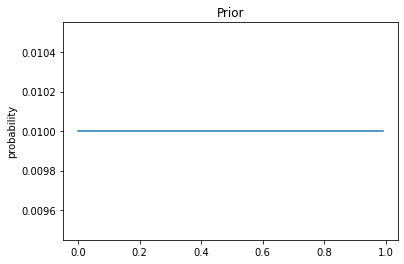

In [17]:
# numpy 是专门用于数组运算的包
import numpy as np

# 从scipy.stats里输入均匀分布的函数
from scipy.stats import uniform

# matplotlib.pyplot 是专门用于画图的包
import matplotlib.pyplot as plt



# 起点为0，终点为1(不包括1)，步长为0.01生成数组
x = np.arange(start = 0, stop = 1, step = 0.01)

# 均匀分布的概率密度函数,x为变量，0为均匀分布起点，100为均匀分布的点的数量
y_prior = uniform.pdf(x,loc = 0,scale = 100)

# 画折线图
plt.plot(x,y_prior)

# 添加标题
plt.title("Prior")

# 添加y轴标签
plt.ylabel("probability")

Text(0, 0.5, 'likelihood')

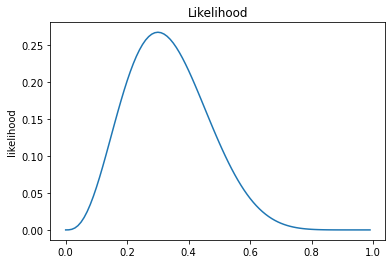

In [20]:
# numpy 是专门用于数组运算的包
import numpy as np

# matplotlib.pyplot 是专门用于画图的包
import matplotlib.pyplot as plt


# 起点为0，终点为1(不包括1)，步长为0.01生成数组
x = np.arange(start = 0, stop = 1, step = 0.01)

# comb这个函数是专门用来算组合数的
from scipy.special import comb

theta = x

#  $\operatorname{Pr}(Z = 3\mid \theta) = \binom{10}{3} \theta^{3}(1-\theta)^{10-3}$
y_likelihood = comb(10,3)*((theta)**(3))*((1-theta)**(10-3))
# 画条形图
plt.plot(x,y_likelihood)

# 添加标题
plt.title("Likelihood")

# 添加y轴标签
plt.ylabel("likelihood")



Text(0, 0.5, 'probability density')

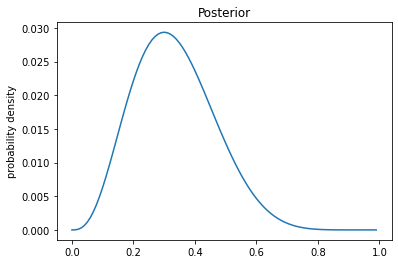

In [24]:
# numpy 是专门用于数组运算的包
import numpy as np

# matplotlib.pyplot 是专门用于画图的包
import matplotlib.pyplot as plt

# 起点为0，终点为1(不包括1)，步长为0.01生成数组
x = np.arange(start = 0, stop = 1, step = 0.01)


# P(\theta|data) = \frac{P(data|\theta)*P(\theta)}{P(data)} 
y_posterior = (y_prior*y_likelihood)/np.sum(y_prior*y_likelihood)

# 画折线图
plt.plot(x,y_posterior)


# 添加标题
plt.title("Posterior")

# 添加y轴标签
plt.ylabel("probability density")



在我们认为手指落在陆地上的概率是均值为0.3，标准差为0.1正态分布的之后。

Text(0, 0.5, 'probability')

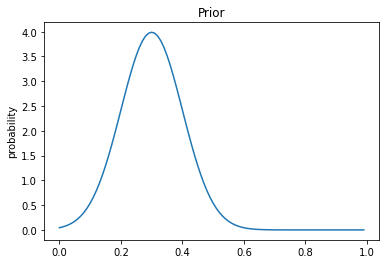

In [1]:
# numpy 是专门用于数组运算的包
import numpy as np

# 从scipy.stats里输入正态分布的函数
from scipy.stats import norm

# matplotlib.pyplot 是专门用于画图的包
import matplotlib.pyplot as plt



# 起点为0，终点为1(不包括1)，步长为0.01生成数组
x = np.arange(start = 0, stop = 1, step = 0.01)

# 正态分布的概率密度函数,x为变量，0.3为平均值，0.1为标准差
y_prior = norm.pdf(x,0.3,0.1)

# 画折线图
plt.plot(x,y_prior)

# 添加标题
plt.title("Prior")

# 添加y轴标签
plt.ylabel("probability")

Text(0, 0.5, 'likelihood')

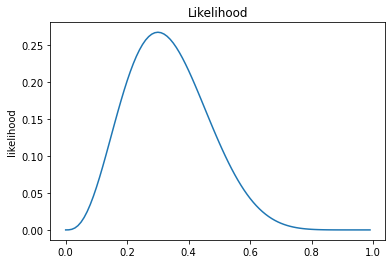

In [2]:
# numpy 是专门用于数组运算的包
import numpy as np

# matplotlib.pyplot 是专门用于画图的包
import matplotlib.pyplot as plt


# 起点为0，终点为1(不包括1)，步长为0.01生成数组
x = np.arange(start = 0, stop = 1, step = 0.01)

# comb这个函数是专门用来算组合数的
from scipy.special import comb

theta = x

#  $\operatorname{Pr}(Z = 3\mid \theta) = \binom{10}{3} \theta^{3}(1-\theta)^{10-3}$
y_likelihood = comb(10,3)*((theta)**(3))*((1-theta)**(10-3))
# 画条形图
plt.plot(x,y_likelihood)

# 添加标题
plt.title("Likelihood")

# 添加y轴标签
plt.ylabel("likelihood")


Text(0, 0.5, 'probability density')

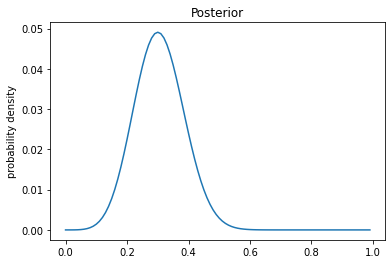

In [3]:
# numpy 是专门用于数组运算的包
import numpy as np

# matplotlib.pyplot 是专门用于画图的包
import matplotlib.pyplot as plt

# 起点为0，终点为1(不包括1)，步长为0.01生成数组
x = np.arange(start = 0, stop = 1, step = 0.01)


# P(\theta|data) = \frac{P(data|\theta)*P(\theta)}{P(data)} 
y_posterior = (y_prior*y_likelihood)/np.sum(y_prior*y_likelihood)

# 画折线图
plt.plot(x,y_posterior)


# 添加标题
plt.title("Posterior")

# 添加y轴标签
plt.ylabel("probability density")

若我们刻意改变旋转地球仪后手指指向陆地的先验概率，使手指指向陆地的先验概率不可能低于0.3

Text(0, 0.5, 'probability')

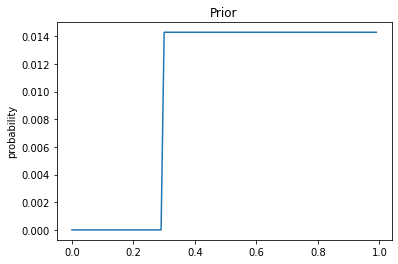

In [4]:
# numpy 是专门用于数组运算的包
import numpy as np

# 从scipy.stats里输入正态分布的函数
from scipy.stats import norm

# matplotlib.pyplot 是专门用于画图的包
import matplotlib.pyplot as plt



# 起点为0，终点为1(不包括1)，步长为0.01生成数组
x = np.arange(start = 0, stop = 1, step = 0.01)

# 手指指向陆地的先验概率不可能低于0.5
y_prior = np.concatenate([np.repeat(0,30),np.repeat(1,70)])/np.sum(np.concatenate([np.repeat(0,30),np.repeat(1,70)]))

# 画折线图
plt.plot(x,y_prior)

# 添加标题
plt.title("Prior")

# 添加y轴标签
plt.ylabel("probability")

Text(0, 0.5, 'likelihood')

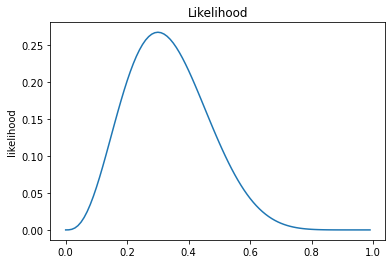

In [5]:
# numpy 是专门用于数组运算的包
import numpy as np

# matplotlib.pyplot 是专门用于画图的包
import matplotlib.pyplot as plt


# 起点为0，终点为1(不包括1)，步长为0.01生成数组
x = np.arange(start = 0, stop = 1, step = 0.01)

# comb这个函数是专门用来算组合数的
from scipy.special import comb

theta = x

#  $\operatorname{Pr}(Z = 3\mid \theta) = \binom{10}{3} \theta^{3}(1-\theta)^{10-3}$
y_likelihood = comb(10,3)*((theta)**(3))*((1-theta)**(10-3))
# 画条形图
plt.plot(x,y_likelihood)

# 添加标题
plt.title("Likelihood")

# 添加y轴标签
plt.ylabel("likelihood")

Text(0, 0.5, 'probability density')

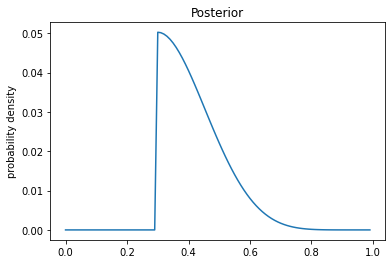

In [6]:
# numpy 是专门用于数组运算的包
import numpy as np

# matplotlib.pyplot 是专门用于画图的包
import matplotlib.pyplot as plt

# 起点为0，终点为1(不包括1)，步长为0.01生成数组
x = np.arange(start = 0, stop = 1, step = 0.01)


# P(\theta|data) = \frac{P(data|\theta)*P(\theta)}{P(data)} 
y_posterior = (y_prior*y_likelihood)/np.sum(y_prior*y_likelihood)

# 画折线图
plt.plot(x,y_posterior)


# 添加标题
plt.title("Posterior")

# 添加y轴标签
plt.ylabel("probability density")

若我们刻意改变旋转地球仪后手指指向陆地的先验概率，使手指指向陆地的概率在0.3以下特别低，超过0.3的话越接近1的概率越低

Text(0, 0.5, 'probability')

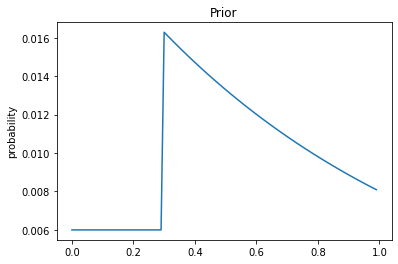

In [11]:
# numpy 是专门用于数组运算的包
import numpy as np

# 从scipy.stats里输入正态分布的函数
from scipy.stats import norm

# matplotlib.pyplot 是专门用于画图的包
import matplotlib.pyplot as plt



# 起点为0，终点为1(不包括1)，步长为0.01生成数组
x = np.arange(start = 0, stop = 1, step = 0.01)

# 正态分布的概率密度函数,x为变量，0.5为平均值，0.1为标准差
y_prior = np.concatenate([np.exp(np.linspace(0,0,30)),np.exp(np.linspace(1,0.3,70))])/np.sum(np.concatenate([np.exp(np.linspace(0,0,30)),np.exp(np.linspace(1,0.3,70))]))

# 画折线图
plt.plot(x,y_prior)

# 添加标题
plt.title("Prior")

# 添加y轴标签
plt.ylabel("probability")

Text(0, 0.5, 'likelihood')

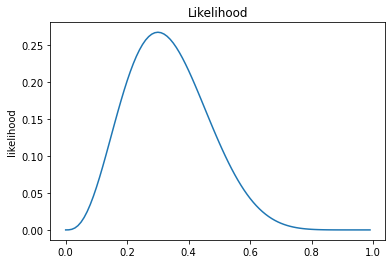

In [12]:
# numpy 是专门用于数组运算的包
import numpy as np

# matplotlib.pyplot 是专门用于画图的包
import matplotlib.pyplot as plt


# 起点为0，终点为1(不包括1)，步长为0.01生成数组
x = np.arange(start = 0, stop = 1, step = 0.01)

# comb这个函数是专门用来算组合数的
from scipy.special import comb

theta = x

#  $\operatorname{Pr}(Z = 3\mid \theta) = \binom{10}{3} \theta^{3}(1-\theta)^{10-3}$
y_likelihood = comb(10,3)*((theta)**(3))*((1-theta)**(10-3))
# 画条形图
plt.plot(x,y_likelihood)

# 添加标题
plt.title("Likelihood")

# 添加y轴标签
plt.ylabel("likelihood")

Text(0, 0.5, 'probability density')

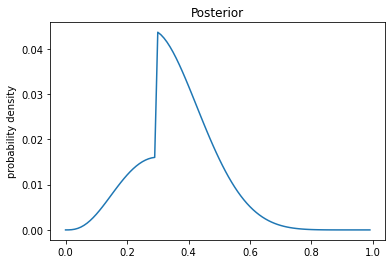

In [13]:
# numpy 是专门用于数组运算的包
import numpy as np

# matplotlib.pyplot 是专门用于画图的包
import matplotlib.pyplot as plt

# 起点为0，终点为1(不包括1)，步长为0.01生成数组
x = np.arange(start = 0, stop = 1, step = 0.01)


# P(\theta|data) = \frac{P(data|\theta)*P(\theta)}{P(data)} 
y_posterior = (y_prior*y_likelihood)/np.sum(y_prior*y_likelihood)

# 画折线图
plt.plot(x,y_posterior)


# 添加标题
plt.title("Posterior")

# 添加y轴标签
plt.ylabel("probability density")